In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from scipy.misc import imread
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Simple K-Means
In this assignment, we will walk you through an implementation of the simple K-Means algorithm.

The K-means algorithm works as follows, assuming we have inputs $x_{1}$, $x_{2}$, $x_{3}$, ..., $x_{n}$ and value of K
- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each $x_{i}$ to nearest cluster by calculating its distance to each centroid.
- Step 3 - Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

![alt text](kmeansdetail.gif "2D K-means")

# Image Clustering

In [2]:
image_data = imread("flowers.jpg")

c:\users\omasm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


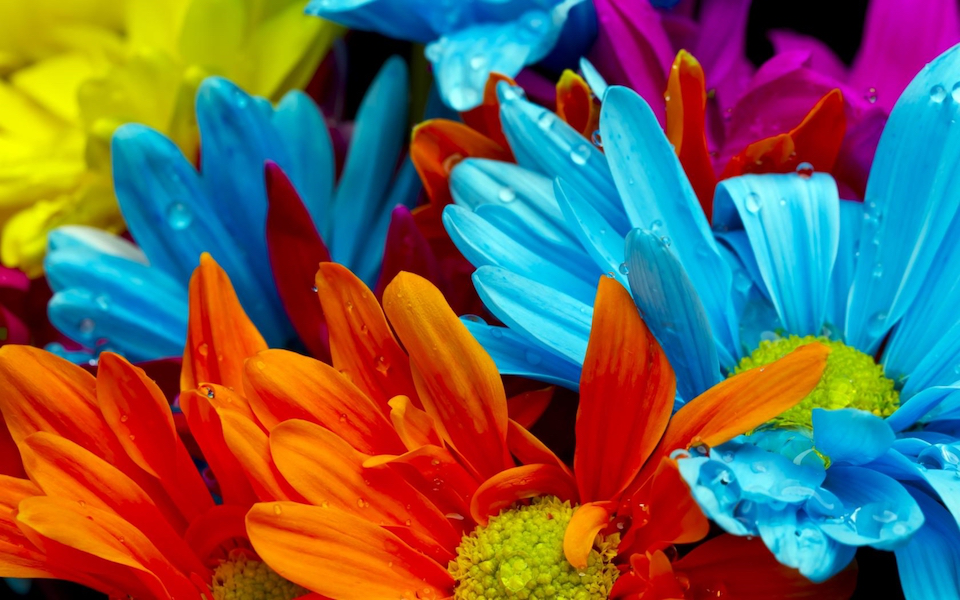

In [3]:
Image.fromarray(image_data, 'RGB')

In [4]:
k = 10

### Step1: Initialize k random points as centroids

In [5]:
pixel_clusters = np.random.randint(0, high=k, size=(image_data.shape[0], image_data.shape[1]))

In [6]:
cluster_centers = np.array([image_data[pixel_clusters == i].mean(axis=0) for i in range(k)])

### Step 2: Assign each $x_{i}$ to nearest cluster by calculating its distance to each centroid.

In [7]:
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        pixel_clusters[i][j] = np.argmin(np.linalg.norm(cluster_centers - image_data[i][j],axis=1))

### Step 3 - Find new cluster center by taking the average of the assigned points.

In [8]:
for z in range(5):
    for i in range(k):
        data_points = image_data[pixel_clusters == i]
        print(data_points)
        cluster_centers[i] = data_points.mean(axis=0) if data_points.size > 0 else np.random.rand(3) * 255
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            pixel_clusters[i][j] = np.argmin(np.linalg.norm(cluster_centers - image_data[i][j], axis=1))

[]
[[ 11  58 138]
 [ 81  24 139]
 [ 96  10 137]
 ...
 [ 16  77  95]
 [ 14  76  97]
 [ 11  70 100]]
[[104 179 122]
 [ 96 185 155]
 [ 86 190 179]
 ...
 [  6 155 198]
 [  6 141 189]
 [  4 126 177]]
[[207 199   0]
 [207 199   0]
 [207 199   0]
 ...
 [194  38  15]
 [190  33  14]
 [177  27  12]]
[[249 197 113]
 [246 196 107]
 [168 152 119]
 ...
 [215 191 103]
 [187 172  91]
 [198 182  94]]
[[201   1 196]
 [201   1 196]
 [201   1 195]
 [191   2 190]
 [180   1 188]
 [198   1 194]
 [201   1 195]
 [201   1 195]
 [198   1 195]
 [191   0 192]
 [183   2 193]
 [199   0 196]
 [196   0 195]
 [193   0 194]
 [189   2 193]
 [188   3 192]
 [186   3 191]
 [198   0 197]
 [195   1 194]
 [189   4 193]
 [183   8 187]
 [199   4 194]
 [191   7 189]
 [174   8 178]
 [162  46 183]
 [197   4 191]
 [189   7 187]
 [167  46 185]
 [192   7 189]
 [164  23 180]
 [163  50 192]
 [178  11 179]
 [151  41 176]
 [171  21 180]
 [201   6 196]
 [192   7 189]
 [153  54 173]
 [197   9 192]
 [175   7 180]
 [202   8 192]
 [199   6 193

In [11]:
output_image = np.zeros(image_data.shape)
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        output_image[i][j] = cluster_centers[pixel_clusters[i][j]]

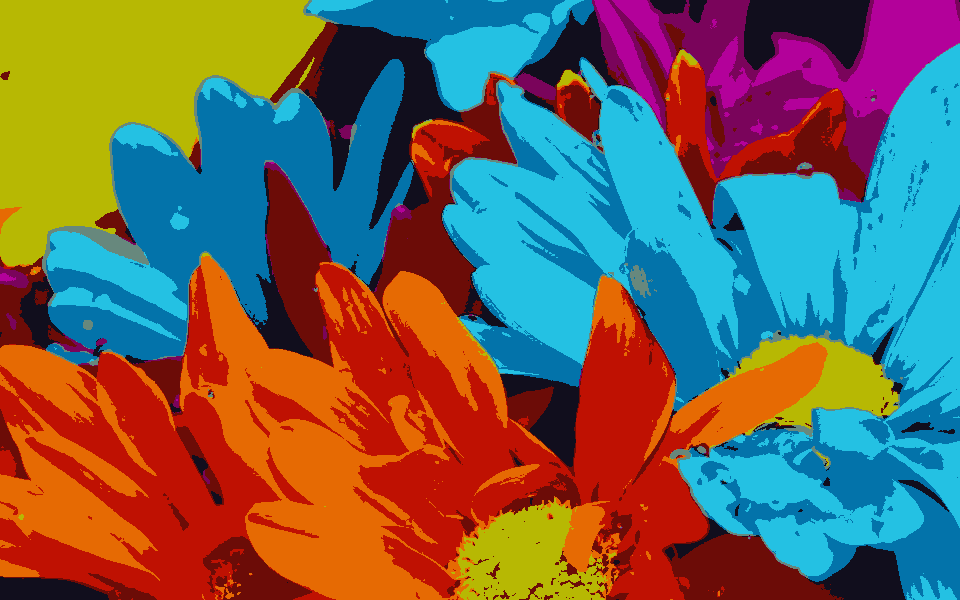

In [12]:
Image.fromarray(output_image.astype('uint8'), 'RGB')